# ஜெனடிக் ஆல்காரிதங்கள்

இந்த நோட்புக் [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) இன் ஒரு பகுதியாகும்.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## சில கோட்பாடுகள்

**ஜெனடிக் அல்காரிதங்கள்** (GA) என்பது **உயிரியல் முறையை** அடிப்படையாகக் கொண்ட AI அணுகுமுறையாகும், இதில் மக்கள் தொகையின் பரிணாம முறைகள் பயன்படுத்தப்பட்டு கொடுக்கப்பட்ட பிரச்சினைக்கு சிறந்த தீர்வை பெற முயற்சிக்கப்படுகிறது. இவை 1975 ஆம் ஆண்டில் [ஜான் ஹென்றி ஹாலண்ட்](https://en.wikipedia.org/wiki/John_Henry_Holland) மூலம் முன்மொழியப்பட்டன.

ஜெனடிக் அல்காரிதங்கள் பின்வரும் கருத்துக்களை அடிப்படையாகக் கொண்டவை:
* பிரச்சினைக்கு செல்லுபடியாகும் தீர்வுகளை **ஜீன்கள்** மூலம் பிரதிநிதித்துவப்படுத்தலாம்.
* **கிராஸ் ஓவர்** மூலம் இரண்டு தீர்வுகளை இணைத்து புதிய செல்லுபடியாகும் தீர்வை பெறலாம்.
* **தேர்வு** என்பது **தகுதி செயல்பாடு** மூலம் சிறந்த தீர்வுகளைத் தேர்ந்தெடுக்க உதவுகிறது.
* **மாறுபாடுகள்** (Mutations) அறிமுகப்படுத்தப்பட்டு, உள்ளூர் குறைந்தபட்சத்தில் இருந்து வெளியேறி சிறந்த தீர்வை பெற உதவுகிறது.

ஜெனடிக் அல்காரிதத்தை செயல்படுத்த விரும்பினால், உங்களுக்கு பின்வருவன தேவைப்படும்:

 * **ஜீன்கள்** $g\in\Gamma$ மூலம் பிரச்சினை தீர்வுகளை குறியாக்கும் ஒரு முறையை கண்டுபிடிக்க வேண்டும்.
 * ஜீன்களின் தொகுதியில் $\Gamma$, **தகுதி செயல்பாடு** $\mathrm{fit}: \Gamma\to\mathbb{R}$ வரையறுக்க வேண்டும். குறைந்த செயல்பாட்டு மதிப்புகள் சிறந்த தீர்வுகளை குறிக்கும்.
 * இரண்டு ஜீன்களை இணைத்து புதிய செல்லுபடியாகும் தீர்வை பெற **கிராஸ் ஓவர்** முறைமை $\mathrm{crossover}: \Gamma^2\to\Gamma$ வரையறுக்க வேண்டும்.
 * **மாறுபாடு** முறைமை $\mathrm{mutate}: \Gamma\to\Gamma$ வரையறுக்க வேண்டும்.
பல சந்தர்ப்பங்களில், கிராஸ் ஓவர் மற்றும் மாறுபாடு என்பது ஜீன்களை எண் வரிசைகள் அல்லது பிட் வெக்டர்களாக மாற்றுவதற்கான எளிய அல்காரிதமாக இருக்கும்.

ஜெனடிக் அல்காரிதத்தின் குறிப்பிட்ட செயல்பாடுகள் வழக்குக்கு வழக்கு மாறுபடும், ஆனால் அதன் மொத்த அமைப்பு பின்வருமாறு இருக்கும்:

1. ஆரம்ப மக்கள் தொகையைத் தேர்ந்தெடுக்கவும் $G\subset\Gamma$
2. இந்த கட்டத்தில் செய்யப்படும் செயல்பாடுகளை (கிராஸ் ஓவர் அல்லது மாறுபாடு) சீரற்ற முறையில் தேர்ந்தெடுக்கவும்.
3. **கிராஸ் ஓவர்**:
  * சீரற்ற முறையில் இரண்டு ஜீன்களைத் தேர்ந்தெடுக்கவும் $g_1, g_2 \in G$
  * கிராஸ் ஓவர் கணக்கிடவும் $g=\mathrm{crossover}(g_1,g_2)$
  * $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ அல்லது $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ என்றால் - மக்கள் தொகையில் உள்ள தொடர்புடைய ஜீனை $g$ மூலம் மாற்றவும்.
4. **மாறுபாடு** - சீரற்ற முறையில் ஒரு ஜீனைத் தேர்ந்தெடுக்கவும் $g\in G$ மற்றும் அதை $\mathrm{mutate}(g)$ மூலம் மாற்றவும்.
5. $\mathrm{fit}$ மதிப்பு போதுமான அளவு குறைவாக வரும் வரை அல்லது கட்டங்களின் எண்ணிக்கைக்கு வரையறுக்கப்பட்ட எல்லை அடையும் வரை, 2-வது கட்டத்திலிருந்து மீண்டும் தொடங்கவும்.

GA மூலம் பொதுவாக தீர்க்கப்படும் பணிகள்:
1. அட்டவணை மேம்பாடு
1. சிறந்த பொருத்து
1. சிறந்த வெட்டு
1. முழுமையான தேடலை வேகமாக்குதல்


## பிரச்சினை 1: நியாயமான பொக்கிஷப் பகிர்வு

**பணி**:  
இருவர் ஒரு பொக்கிஷத்தை கண்டுபிடித்தனர், அதில் வெவ்வேறு அளவிலான வைரங்கள் உள்ளன (அதனால், வெவ்வேறு விலையும்). அவர்கள் அந்த பொக்கிஷத்தை இரண்டு பகுதிகளாகப் பிரிக்க வேண்டும், அதில் விலை வேறுபாடு 0 (அல்லது குறைவாக) இருக்க வேண்டும்.

**சரியான வரையறை**:  
எங்களிடம் ஒரு எண்களின் தொகுப்பு $S$ உள்ளது. இதை இரண்டு துணைத்தொகுப்புகளாக $S_1$ மற்றும் $S_2$ பிரிக்க வேண்டும், அப்படி பிரிக்கும்போது $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ மற்றும் $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

முதலில், தொகுப்பு $S$ ஐ வரையறுக்கலாம்:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

ஒவ்வொரு சாத்தியமான தீர்வையும் பைனரி வெக்டர் $B\in\{0,1\}^N$ மூலம் குறியாக்கம் செய்யலாம், இதில் $i$-வது இடத்தில் உள்ள எண், அசல் தொகுதி $S$-இல் உள்ள $i$-வது எண் எந்த தொகுதிக்கு ($S_1$ அல்லது $S_2$) சேர்ந்தது என்பதை காட்டுகிறது. `generate` செயல்பாடு அந்த சீரற்ற பைனரி வெக்டர்களை உருவாக்கும்.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


இப்போது `fit` செயல்பாட்டை வரையறுப்போம், இது தீர்வின் "செலவை" கணக்கிடும். இது இரண்டு தொகுதிகளின், $S_1$ மற்றும் $S_2$ இன் கூட்டத்தின் வித்தியாசமாக இருக்கும்:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

இப்போது மியூட்டேஷன் மற்றும் கிராஸ் ஓவர் செயல்பாடுகளை வரையறுக்க வேண்டும்:
* மியூட்டேஷனுக்காக, ஒரு சீரற்ற பிட்டை தேர்ந்தெடுத்து அதை மாற்றுவோம் (0 இருந்து 1 ஆகவும், 1 இருந்து 0 ஆகவும் மாற்றம் செய்யவும்).
* கிராஸ் ஓவருக்காக, ஒரு வெக்டரிலிருந்து சில பிட்டுகளை எடுத்து, மற்றொன்றிலிருந்து சில பிட்டுகளை எடுப்போம். எந்த உள்ளீட்டு மாஸ்குகளிலிருந்து எந்த பிட்டுகளை எடுக்க வேண்டும் என்பதை சீரற்றமாக தேர்ந்தெடுக்க, அதே `generate` செயல்பாட்டைப் பயன்படுத்துவோம்.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

ஆரம்ப மக்கள் தொகையான தீர்வுகள் $P$ ஐ `pop_size` அளவிற்கு உருவாக்குவோம்:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

இப்போது, பரிணாமத்தை செயல்படுத்த முக்கிய செயல்பாடு. `n` என்பது பரிணாமத்தின் படிகளை குறிக்கிறது. ஒவ்வொரு படியிலும்:

* 30% சாத்தியத்துடன், ஒரு மியூட்டேஷனைச் செய்கிறோம், மேலும் மிக மோசமான `fit` செயல்பாட்டுடன் உள்ள கூறை மியூட்டேட் செய்யப்பட்ட கூறால் மாற்றுகிறோம்.
* 70% சாத்தியத்துடன், ஒரு கிராஸ்ஓவரைச் செய்கிறோம்.

இந்த செயல்பாடு சிறந்த தீர்வை (சிறந்த தீர்வுக்கு இணையான ஜீனை) மற்றும் ஒவ்வொரு சுழற்சியிலும் மக்கள் தொகையில் குறைந்த `fit` செயல்பாட்டின் வரலாற்றை திருப்பித் தருகிறது.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


நீங்கள் காணலாம், நாங்கள் `fit` செயல்பாட்டை மிகவும் குறைக்க முடிந்துள்ளோம்! இங்கே முழு மக்கள்தொகைக்கு `fit` செயல்பாடு செயல்படும் விதத்தை காட்டும் வரைபடம் உள்ளது.


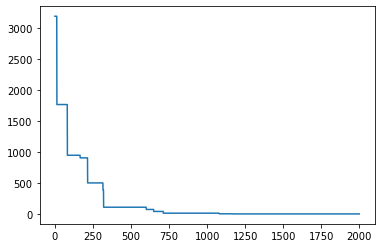

In [10]:
plt.plot(hist)
plt.show()

## பிரச்சினை 2: N குயின்ஸ் பிரச்சினை

**பணி**:
நீங்கள் $N$ குயின்களை $N\times N$ அளவுள்ள சதுரங்க பலகையில் ஒருவருக்கொருவர் தாக்காத வகையில் அமைக்க வேண்டும்.

முதலில், ஜெனடிக் ஆல்காரிதம்களைப் பயன்படுத்தாமல், முழுமையான தேடலைப் பயன்படுத்தி பிரச்சினையை தீர்ப்போம். சதுரங்க பலகையின் நிலையை $L$ பட்டியலால் பிரதிநிதித்துவப்படுத்தலாம், இதில் $i$-வது எண்ணிக்கை $i$-வது வரிசையில் குயினின் கிடைமட்ட நிலையை குறிக்கிறது. ஒவ்வொரு தீர்விலும் ஒவ்வொரு வரிசையிலும் ஒரு குயின் மட்டுமே இருக்கும், மேலும் ஒவ்வொரு வரிசையிலும் ஒரு குயின் இருக்கும் என்பது தெளிவாக உள்ளது.

நமது இலக்கு பிரச்சினைக்கு முதல் தீர்வை கண்டறிவதாக இருக்கும், அதன் பிறகு தேடலை நிறுத்துவோம். இந்த செயல்பாட்டை குயின்களின் அனைத்து சாத்தியமான நிலைகளை உருவாக்குவதற்காக எளிதாக விரிவாக்கலாம்.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


இப்போது அதே பிரச்சினையை ஜெனடிக் ஆல்காரிதம் பயன்படுத்தி தீர்ப்போம். இந்த தீர்வு [இந்த வலைப்பதிவில்](https://kushalvyas.github.io/gen_8Q.html) இருந்து ஈர்க்கப்பட்டது.

ஒவ்வொரு தீர்வையும் $N$ நீளமுள்ள அதே பட்டியலால் பிரதிநிதித்துவப்படுத்துவோம், மேலும் `fit` செயல்பாடாக, ஒருவருக்கொருவர் தாக்கும் ராணிகளின் எண்ணிக்கையை எடுத்துக்கொள்வோம்:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

காரணமாக உடல் தகுதி செயல்பாட்டை கணக்கிடுவது நேரம் பிடிக்கும், ஒவ்வொரு தீர்வையும் உடல் தகுதி செயல்பாட்டின் மதிப்புடன் சேர்த்து மக்கள் தொகையில் சேமிப்போம். ஆரம்ப மக்கள் தொகையை உருவாக்குவோம்:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

இப்போது நாமும் மியூட்டேஷன் மற்றும் கிராஸ்ஓவர் செயல்பாடுகளை வரையறுக்க வேண்டும். கிராஸ்ஓவர் என்பது இரண்டு ஜீன்களை ஒன்றாக இணைப்பதற்காக அவற்றை ஒரு சீரற்ற இடத்தில் உடைத்து, வெவ்வேறு ஜீன்களில் இருந்து இரண்டு பகுதிகளை இணைப்பதன் மூலம் செயல்படும்.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

நாங்கள் ஜீன் தேர்வு செயல்முறையை மேம்படுத்துவோம், மேலும் நல்ல உடல் அமைப்பு செயல்பாட்டுடன் ஜீன்களை தேர்வு செய்வதன் மூலம். ஜீன் தேர்வு செய்யப்படும் வாய்ப்பு உடல் அமைப்பு செயல்பாட்டின் மீது निर्भर करेगा:


In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

இப்போது முக்கியமான பரிணாம சுழற்சியை வரையறுப்போம். முந்தைய உதாரணத்திலிருந்து லாஜிக்கை சற்று மாறுபடச் செய்வோம், ஒருவர் படைப்பாற்றலாக செயல்பட முடியும் என்பதை காட்ட. நாம் சரியான தீர்வை (fitness function=0) பெறும் வரை சுழற்சியை தொடர்வோம், மேலும் ஒவ்வொரு படியிலும் தற்போதைய தலைமுறையை எடுத்து, அதே அளவிலான புதிய தலைமுறையை உருவாக்குவோம். இது `nxgeneration` செயல்பாட்டைப் பயன்படுத்தி, கீழ்க்கண்ட படிகளின் மூலம் செய்யப்படுகிறது:

1. மிகவும் தகுதியற்ற தீர்வுகளை நீக்குங்கள் - இதைச் செய்ய `discard_unfit` என்ற செயல்பாடு உள்ளது
1. தலைமுறைக்கு மேலும் சில சீரற்ற தீர்வுகளைச் சேர்க்கவும்
1. புதிய தலைமுறையை `gen_size` அளவுக்கு உருவாக்கவும், ஒவ்வொரு புதிய ஜீனுக்கும் கீழ்க்கண்ட படிகளைப் பின்பற்றவும்:
    - இரண்டு சீரற்ற ஜீன்களை தேர்ந்தெடுக்கவும், fitness function-க்கு ஏற்ப சாத்தியமானProbability-ஐப் பயன்படுத்தி
    - ஒரு crossover-ஐ கணக்கிடவும்
    - `mutation_prob` சாத்தியத்துடன் ஒரு mutation-ஐப் பயன்படுத்தவும்


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

அதிகাংশ நேரங்களில் நாம் ஒரு தீர்வை மிகவும் விரைவாக பெற முடிகிறது என்பது சுவாரஸ்யமாக உள்ளது, ஆனால் சில அரிதான சந்தர்ப்பங்களில் மேம்படுத்தல் உள்ளூர் குறைந்தபட்சத்தில் அடைந்து, செயல்முறை நீண்ட நேரம் சிக்கிக்கொள்கிறது. சராசரி நேரத்தை அளவிடும் போது இதை கருத்தில் கொள்ளுவது முக்கியம்: அதிகமான சந்தர்ப்பங்களில் ஜெனெடிக் ஆல்காரிதம் முழுமையான தேடலுக்கு விட வேகமாக இருக்கும், ஆனால் சில நேரங்களில் இது அதிக நேரம் எடுக்கலாம். இந்த பிரச்சினையை சமாளிக்க, பரிந்துரைக்கப்படும் தீர்வாக பரம்பரைகளின் எண்ணிக்கையை வரையறுக்குவது பொருத்தமாக இருக்கும், மேலும் தீர்வை கண்டுபிடிக்க முடியாவிட்டால் - நாம் முற்றிலுமாக புதியதாக தொடங்கலாம்.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**அறிவிப்பு**:  
இந்த ஆவணம் [Co-op Translator](https://github.com/Azure/co-op-translator) என்ற AI மொழிபெயர்ப்பு சேவையை பயன்படுத்தி மொழிபெயர்க்கப்பட்டுள்ளது. நாங்கள் துல்லியத்திற்காக முயற்சிக்கிறோம், ஆனால் தானியங்கி மொழிபெயர்ப்புகளில் பிழைகள் அல்லது தவறுகள் இருக்கக்கூடும் என்பதை கவனத்தில் கொள்ளவும். அதன் சொந்த மொழியில் உள்ள மூல ஆவணம் அதிகாரப்பூர்வ ஆதாரமாக கருதப்பட வேண்டும். முக்கியமான தகவல்களுக்கு, தொழில்முறை மனித மொழிபெயர்ப்பு பரிந்துரைக்கப்படுகிறது. இந்த மொழிபெயர்ப்பைப் பயன்படுத்துவதால் ஏற்படும் எந்த தவறான புரிதல்களுக்கும் அல்லது தவறான விளக்கங்களுக்கும் நாங்கள் பொறுப்பல்ல.
